# Exploration des données d'accidents en France

Ce notebook présente les analyses visuelles exploratoires réalisées **avant** le clustering :

- Distribution temporelle (par mois, jours, etc.)
- Répartition des accidents par département et catégories
- Analyse des variables liées aux usagers et véhicules
- Analyse de la gravité selon les mois et autres variables

---


In [12]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from src.preprocessing import load_data, preprocess_caract, preprocess_lieux, preprocess_vehicules, preprocess_usagers

# Chargement et prétraitement
paths = {
    "caract": "../data/processed/caract_clean.csv",
    "lieux": "../data/processed/lieux_clean.csv",
    "vehicules": "../data/processed/vehicules_clean.csv",
    "usagers": "../data/processed/usagers_clean.csv"
}

data = load_data(paths)


## 1. Nombre d'accidents par mois


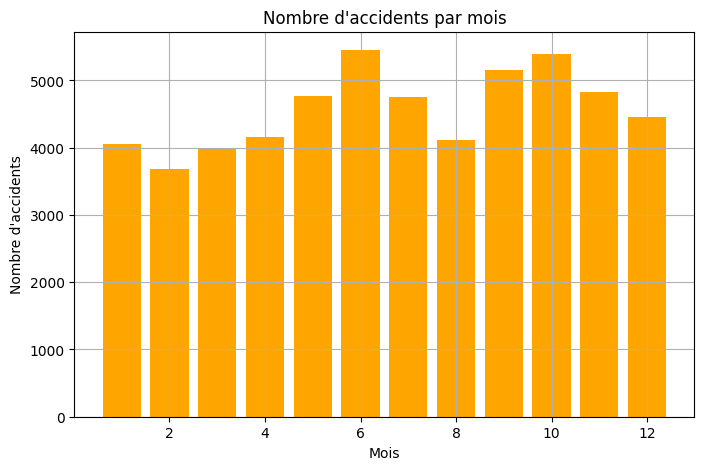

In [13]:
acc_per_month = data["caract"].groupby("mois").size().reset_index(name="accidents")

plt.figure(figsize=(8, 5))
plt.bar(acc_per_month["mois"], acc_per_month["accidents"], color="orange")
plt.title("Nombre d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'accidents")
plt.grid(True)
plt.show()


## 2. Répartition des accidents selon la gravité et les mois

On merge le dataset `caract` avec `usagers` pour analyser la gravité selon le mois.


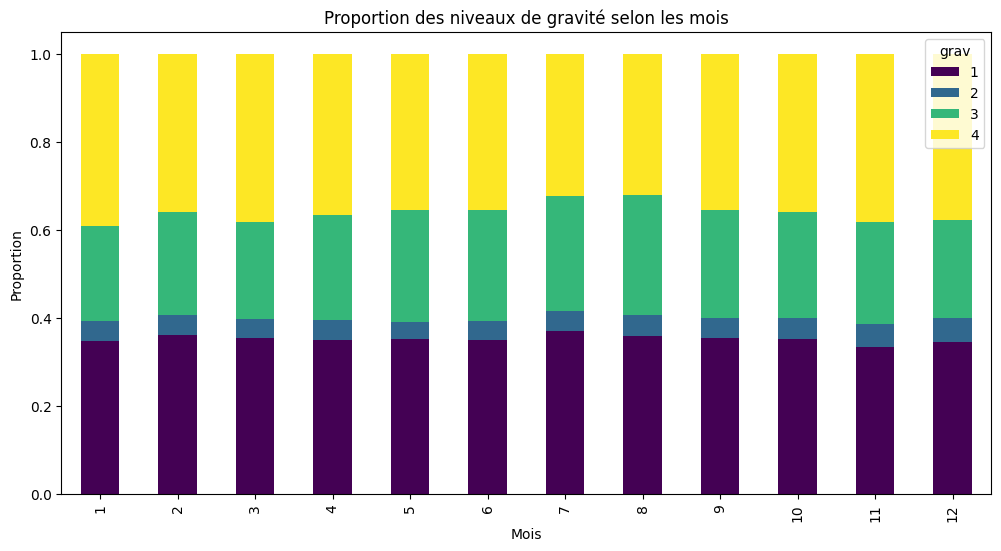

In [15]:
caract_usager = data["caract"].merge(data["usagers"], on="Num_Acc")

grav_counts = caract_usager.groupby(["mois", "grav"]).size().unstack().fillna(0)

proportions = grav_counts.div(grav_counts.sum(axis=1), axis=0)

proportions.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Proportion des niveaux de gravité selon les mois")
plt.xlabel("Mois")
plt.ylabel("Proportion")
plt.show()


## 3. Répartition des accidents par département

Affichage en camembert des 10 départements avec le plus d'accidents et "Autres".


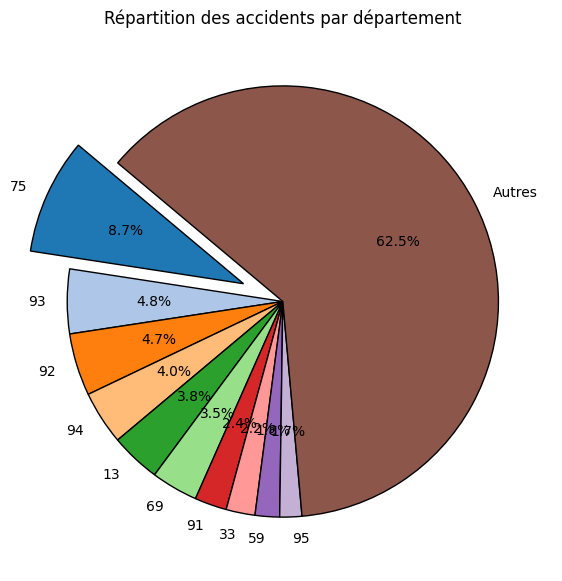

In [16]:
acc_per_dep = data["caract"].groupby("dep").size().reset_index(name="accidents").sort_values(by="accidents", ascending=False)

acc_per_dep_top_10 = acc_per_dep.head(10)
autres = pd.DataFrame({
    "dep": ["Autres"],
    "accidents": [acc_per_dep.iloc[10:]["accidents"].sum()]
})
acc_per_dep_final = pd.concat([acc_per_dep_top_10, autres], ignore_index=True)

colors = plt.cm.tab20.colors
explode = [0.2 if i == 0 else 0 for i in range(len(acc_per_dep_final))]

plt.figure(figsize=(7, 7))
plt.pie(acc_per_dep_final["accidents"], labels=acc_per_dep_final["dep"], autopct='%1.1f%%',
        startangle=140, colors=colors[:len(acc_per_dep_final)], explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title("Répartition des accidents par département")
plt.show()


## 4. Répartition par catégorie de département (dep_cat)

Même visualisation, mais regroupée par catégories régionales.


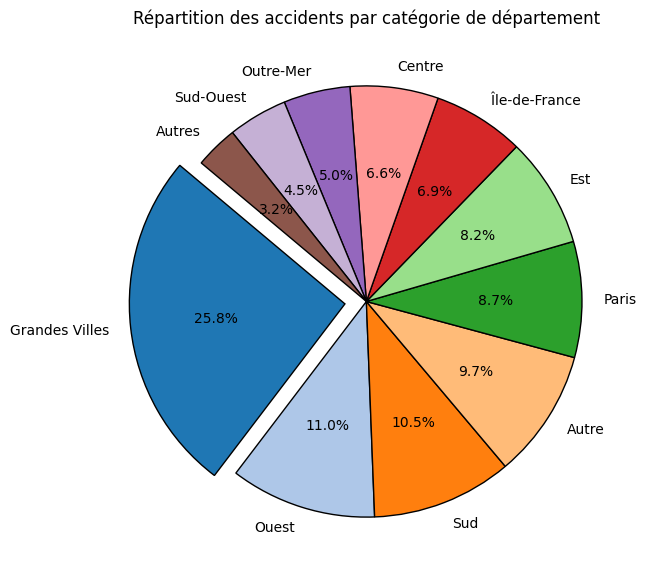

In [17]:
acc_per_dep_cat = data["caract"].groupby("dep_cat").size().reset_index(name="accidents").sort_values(by="accidents", ascending=False)

acc_per_dep_cat_top_10 = acc_per_dep_cat.head(10)
autres_cat = pd.DataFrame({
    "dep_cat": ["Autres"],
    "accidents": [acc_per_dep_cat.iloc[10:]["accidents"].sum()]
})
acc_per_dep_cat_final = pd.concat([acc_per_dep_cat_top_10, autres_cat], ignore_index=True)

explode = [0.1 if i == 0 else 0 for i in range(len(acc_per_dep_cat_final))]

plt.figure(figsize=(7, 7))
plt.pie(acc_per_dep_cat_final["accidents"], labels=acc_per_dep_cat_final["dep_cat"], autopct='%1.1f%%',
        startangle=140, colors=colors[:len(acc_per_dep_cat_final)], explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title("Répartition des accidents par catégorie de département")
plt.show()


## 5. Analyse des catégories de véhicules impliquées

Distribution des véhicules par catégories simplifiées.


C:\Users\benfo\AppData\Local\Temp\ipykernel_7748\2484392802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="catv_categorie", y="count", data=veh_cat_count, palette="Greens_d")


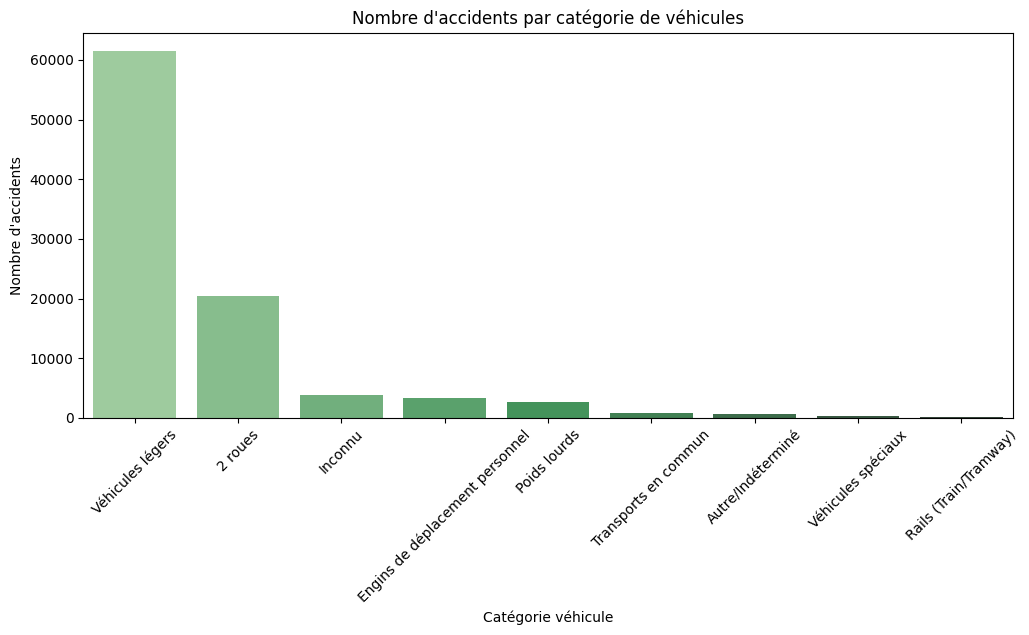

In [19]:
veh_cat_count = data["vehicules"].groupby("catv_categorie").size().reset_index(name="count").sort_values(by="count", ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x="catv_categorie", y="count", data=veh_cat_count, palette="Greens_d")
plt.title("Nombre d'accidents par catégorie de véhicules")
plt.xlabel("Catégorie véhicule")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.show()


## 6. Analyse des places des usagers

Comptage des différentes places (conducteur, passager, piéton...).


C:\Users\benfo\AppData\Local\Temp\ipykernel_7748\2052775859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette="Blues_d")


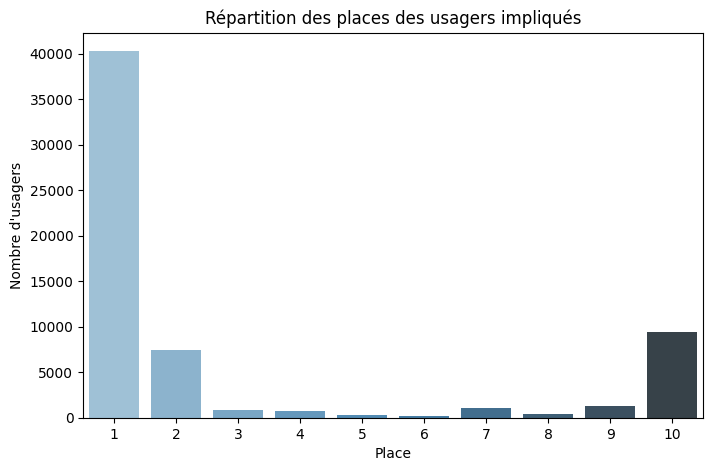

In [20]:
place_counts = data["usagers"]["place"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=place_counts.index, y=place_counts.values, palette="Blues_d")
plt.title("Répartition des places des usagers impliqués")
plt.xlabel("Place")
plt.ylabel("Nombre d'usagers")
plt.show()


## 7. Statistiques de base sur les usagers

Nombre d'usagers par sexe et catégorie.

C:\Users\benfo\AppData\Local\Temp\ipykernel_7748\3045437493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sexe", data=data["usagers"], ax=axes[0], palette="pastel")
C:\Users\benfo\AppData\Local\Temp\ipykernel_7748\3045437493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="catu", data=data["usagers"], ax=axes[1], palette="pastel")


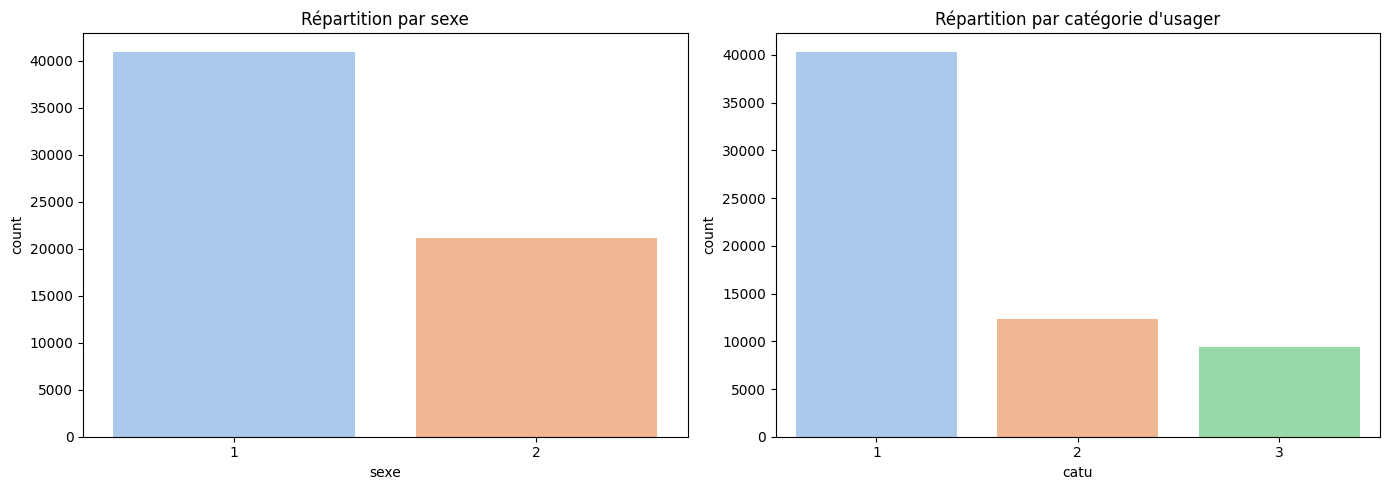

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="sexe", data=data["usagers"], ax=axes[0], palette="pastel")
axes[0].set_title("Répartition par sexe")

sns.countplot(x="catu", data=data["usagers"], ax=axes[1], palette="pastel")
axes[1].set_title("Répartition par catégorie d'usager")

plt.tight_layout()
plt.show()